# IMDB Business-Problem

I have been hired to produce analyze IMDB's extensive publicly-available dataset, supplement it with financial data from TMDB's API, convert the raw data into a MySQL database, and then use that database for extracting insights and recommendations on how to make a successful movie.

I will use a combination of machine-learning-model-based insights and hypothesis testing to extract insights for our stakeholder.

**Specifications and Constraints:** 


* The stakeholder wants to focus on attributes of the movies themselves, vs the actors and directors connected to those movies.


* They only want to include information related to movies released in the United States.


* They also did not want to include movies released before the year 2000.


* The stakeholder is particularly interested in how the MPAA rating, genre(s), runtime, budget, and production companies influence movie revenue and user-ratings.

## Initial IMDB Data Processing

**IMDB Movie Metadata**

***
* I will download fresh movie metadata from IMDB's public datasets and filter out movies that meet the stakeholder's requirments/constraints. 

* IMDB Provides Several Files with varied information for Movies, TV Shows, and much more. 
    * Overview/Data Dictionary: https://www.imdb.com/interfaces/
    * Downloads page: https://datasets.imdbws.com/

* Files used: 
    * title.basics.tsv.gz
    * title.ratings.tsv.gz
    * title.akas.tsv.gz

***

# Imports and Downloading the Data

Some information was Adapted from:https://github.com/jirvingphd/how-to-make-successful-movies

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import missingno

import os

In [2]:
import functions as pf

In [3]:
## Making "Data" Folder to save IMDB files
os.makedirs("Data/",exist_ok=True)
sorted(os.listdir("Data/"))

['combined_tmdb_api_data.csv.gz',
 'final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'final_tmdb_data_2002.csv.gz',
 'final_tmdb_data_2003.csv.gz',
 'final_tmdb_data_2004.csv.gz',
 'final_tmdb_data_2005.csv.gz',
 'final_tmdb_data_2006.csv.gz',
 'final_tmdb_data_2007.csv.gz',
 'final_tmdb_data_2008.csv.gz',
 'final_tmdb_data_2009.csv.gz',
 'final_tmdb_data_2010.csv.gz',
 'final_tmdb_data_2011.csv.gz',
 'final_tmdb_data_2012.csv.gz',
 'final_tmdb_data_2013.csv.gz',
 'final_tmdb_data_2014.csv.gz',
 'final_tmdb_data_2015.csv.gz',
 'final_tmdb_data_2016.csv.gz',
 'final_tmdb_data_2017.csv.gz',
 'final_tmdb_data_2018.csv.gz',
 'final_tmdb_data_2019.csv.gz',
 'final_tmdb_data_2020.csv.gz',
 'final_tmdb_data_2021.csv.gz',
 'final_tmdb_data_2022.csv.gz',
 'title_akas_cleaned.csv.gz',
 'title_basics_cleaned.csv.gz',
 'title_ratings_cleaned.csv.gz',
 'tmdb_api_results_2000.json',
 'tmdb_api_results_2001.json']

## Basics Dataframe

In [4]:
## title basics 
url_title_basics = 'https://datasets.imdbws.com/title.basics.tsv.gz'
basics = pd.read_csv(url_title_basics, sep='\t',low_memory=False)
basics.info()
basics.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9161317 entries, 0 to 9161316
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 629.1+ MB


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


**Specified Filtering/Cleaning Steps:**

* Permanent Steps
    * Replace "\N" with np.nan
    * Keep only title Type==Movie
    * Keep startYear 2000-2022

,# null,% null,# unique,% unique
tconst,0,0.0,9161317,100.00
titleType,0,0.0,11,0.00
primaryTitle,10,0.0,4210535,45.96
originalTitle,10,0.0,4230871,46.18
isAdult,0,0.0,9,0.00
startYear,0,0.0,151,0.00
endYear,0,0.0,98,0.00
runtimeMinutes,0,0.0,874,0.01
genres,10,0.0,2319,0.03


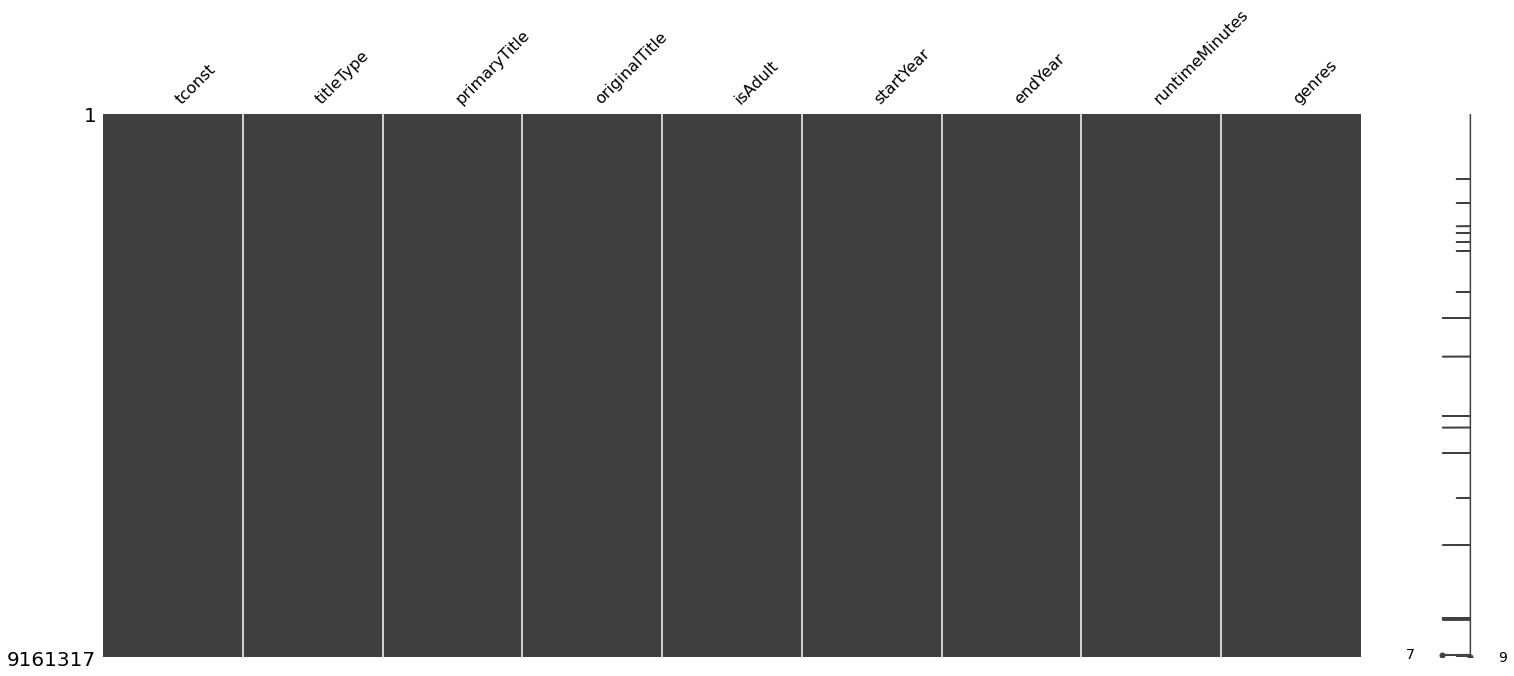

In [5]:
## checking null values
pf.check_nulls_nunique(basics)

,# null,% null,# unique,% unique
tconst,0,0.00,9161317,100.00
titleType,0,0.00,11,0.00
primaryTitle,10,0.00,4210535,45.96
originalTitle,10,0.00,4230871,46.18
isAdult,1,0.00,8,0.00
startYear,1212360,13.23,150,0.00
endYear,9066011,98.96,97,0.00
runtimeMinutes,6698868,73.12,873,0.01
genres,416706,4.55,2318,0.03


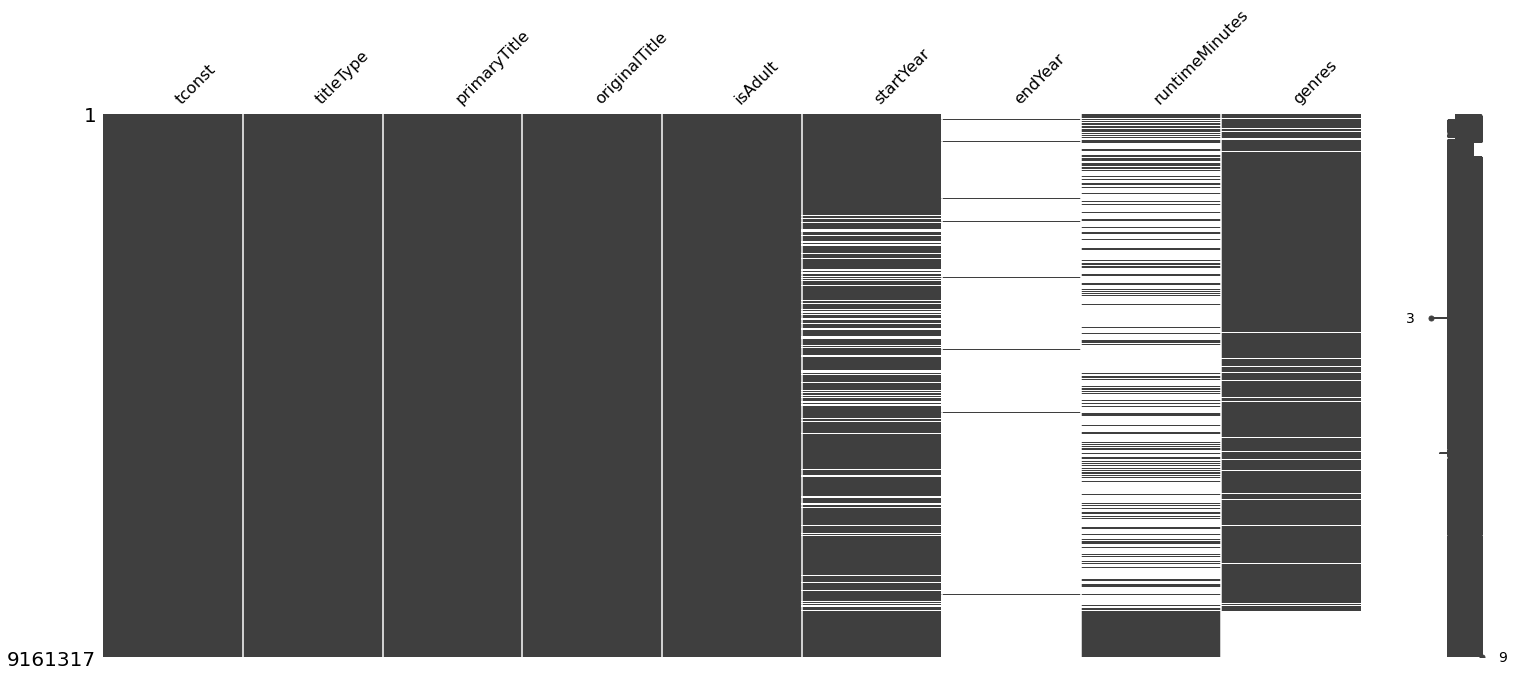

In [6]:
basics.replace({'\\N':np.nan},inplace=True)
pf.check_nulls_nunique(basics)

**Observations:**

* **Note**: `endYear` isn't much of a productive column since we are researching Movies and not TV shows. 
    * Dropping the column.


* **`tconst`** vs **`primary_title`**
    * It's good to note that there are unique tconst values for every row and that only 46% of the titles are unique.
        * For now I'll keep these values untouched but could change this later. 


* **`genres`** are missing 4.5% of the movies. 
    * Genres are important and since there is only 4.5% missing I'll only drop the null values. 


* **`startYear`** is missing 13% of the data which could just be from the movies that have yet to be released. 
    * I'll drop the null values for now. 


* **`runtimeMinutes`** is missing 73% of the data which is a lot! 
    * Going to drop the null values from this feature for now to help reduce the overall number of API calls needed in the next parts.  

In [7]:
## Eliminate movies that are null for runtimeMinute, genres, and startYear
basics = basics.dropna(subset=['runtimeMinutes','genres','startYear'])
pf.check_nulls_nunique(basics, plot=False)

,# null,% null,# unique,% unique
tconst,0,0.00,2358822,100.00
titleType,0,0.00,10,0.00
primaryTitle,1,0.00,1677298,71.11
originalTitle,1,0.00,1694808,71.85
isAdult,0,0.00,2,0.00
startYear,0,0.00,147,0.01
endYear,2313802,98.09,95,0.00
runtimeMinutes,0,0.00,853,0.04
genres,0,0.00,2193,0.09


In [8]:
## drop endYear
basics = basics.drop(columns=['endYear'])
basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...
9161267,tt9916754,movie,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,0,2013,49,Documentary
9161273,tt9916766,tvEpisode,Episode #10.15,Episode #10.15,0,2019,43,"Family,Game-Show,Reality-TV"
9161308,tt9916840,tvEpisode,Horrid Henry's Comic Caper,Horrid Henry's Comic Caper,0,2014,11,"Adventure,Animation,Comedy"
9161315,tt9916856,short,The Wind,The Wind,0,2015,27,Short


## Filtering for Stakeholder Specifications

**Keeping only Full-Length Movies Released in Theaters**

In [9]:
basics['titleType'].value_counts()

tvEpisode       1040079
short            567846
movie            360833
video            174414
tvMovie           87940
tvSeries          85743
tvSpecial         16433
tvMiniSeries      15952
tvShort            9288
videoGame           294
Name: titleType, dtype: int64

In [10]:
## keep only titleType==Movie
basics = basics.loc[ basics['titleType']=='movie']
basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,45,Romance
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,70,"Action,Adventure,Biography"
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,90,Drama
672,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908,120,"Adventure,Fantasy"
1172,tt0001184,movie,Don Juan de Serrallonga,Don Juan de Serrallonga,0,1910,58,"Adventure,Drama"
...,...,...,...,...,...,...,...,...
9161082,tt9916362,movie,Coven,Akelarre,0,2020,92,"Drama,History"
9161166,tt9916538,movie,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,0,2019,123,Drama
9161207,tt9916622,movie,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,0,2015,57,Documentary
9161234,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,0,2007,100,Documentary


In [11]:
is_documentary = basics['genres'].str.contains('documentary',case=False)
is_documentary.value_counts()

False    274975
True      85858
Name: genres, dtype: int64

In [12]:
# Exclude movies that are included in the documentary category.
is_documentary = basics['genres'].str.contains('documentary',case=False)
basics = basics[~is_documentary]

In [13]:
basics['startYear'] = basics['startYear'].astype(float)

C:\Users\nbeac\AppData\Local\Temp\ipykernel_724\3352754901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basics['startYear'] = basics['startYear'].astype(float)


In [14]:
basics = basics[(basics['startYear']>=2000)&(basics['startYear']<2023)]
basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
34790,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,118,"Comedy,Fantasy,Romance"
61089,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El Tango del Viudo y Su Espejo Deformante,0,2020.0,70,Drama
67635,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,122,Drama
77929,tt0079644,movie,November 1828,November 1828,0,2001.0,140,"Drama,War"
86766,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,100,"Comedy,Horror,Sci-Fi"
...,...,...,...,...,...,...,...,...
9160989,tt9916170,movie,The Rehearsal,O Ensaio,0,2019.0,51,Drama
9160998,tt9916190,movie,Safeguard,Safeguard,0,2020.0,95,"Action,Adventure,Thriller"
9161037,tt9916270,movie,Il talento del calabrone,Il talento del calabrone,0,2020.0,84,Thriller
9161082,tt9916362,movie,Coven,Akelarre,0,2020.0,92,"Drama,History"


# Exploring Title Ratings

### Specific Filtering Steps:

* Ratings
    * Replace "\N" with np.nan
* Keep movies that are in final filtered basics dataframe.

In [15]:
ratings_url = "https://datasets.imdbws.com/title.ratings.tsv.gz"
ratings = pd.read_csv(ratings_url,sep='\t', low_memory=False)
ratings.info()
ratings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255994 entries, 0 to 1255993
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1255994 non-null  object 
 1   averageRating  1255994 non-null  float64
 2   numVotes       1255994 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 28.7+ MB


,tconst,averageRating,numVotes
0,tt0000001,5.7,1905
1,tt0000002,5.8,256
2,tt0000003,6.5,1703
3,tt0000004,5.6,168
4,tt0000005,6.2,2518


,# null,% null,# unique,% unique
tconst,0,0.0,1255994,100.00
averageRating,0,0.0,91,0.01
numVotes,0,0.0,20485,1.63


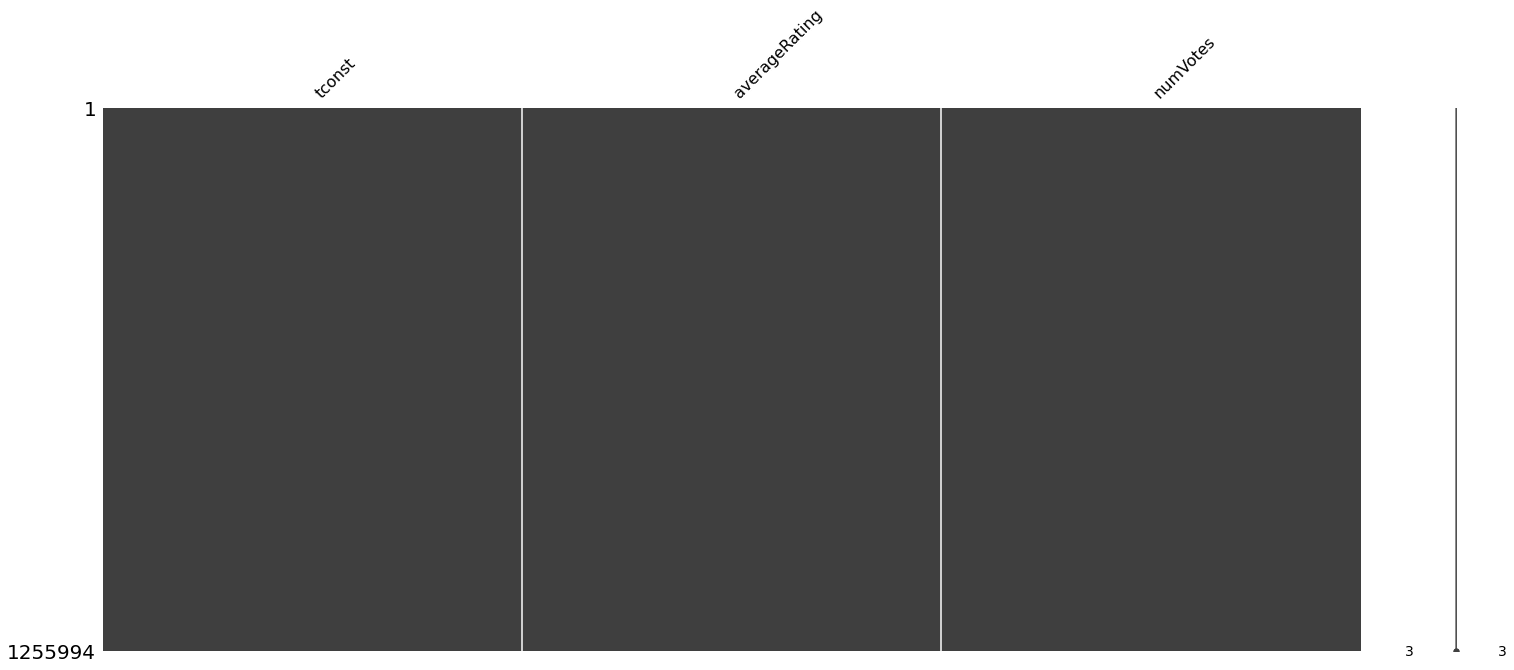

In [16]:
# Replace "\N" with np.nan (if any)
ratings.replace({'\\N':np.nan},inplace=True)
pf.check_nulls_nunique(ratings)

# Exploring AKAs Data

### Filtering Steps: 

* Keep only US entries.
* Replace "\N" with np.nan

In [17]:
akas_url = "https://datasets.imdbws.com/title.akas.tsv.gz"
akas = pd.read_csv(akas_url, sep='\t', low_memory=False)
akas.info()
akas.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32903294 entries, 0 to 32903293
Data columns (total 8 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   titleId          object
 1   ordering         int64 
 2   title            object
 3   region           object
 4   language         object
 5   types            object
 6   attributes       object
 7   isOriginalTitle  object
dtypes: int64(1), object(7)
memory usage: 2.0+ GB


,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0


In [18]:
## The AKAs file has the information on country where it released and language
akas = akas[(akas['region'] == 'US')]
akas

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
5,tt0000001,6,Carmencita,US,\N,imdbDisplay,\N,0
14,tt0000002,7,The Clown and His Dogs,US,\N,\N,literal English title,0
33,tt0000005,10,Blacksmith Scene,US,\N,imdbDisplay,\N,0
36,tt0000005,1,Blacksmithing Scene,US,\N,alternative,\N,0
41,tt0000005,6,Blacksmith Scene #1,US,\N,alternative,\N,0
...,...,...,...,...,...,...,...,...
32902966,tt9916702,1,Loving London: The Playground,US,\N,\N,\N,0
32903003,tt9916720,10,The Demonic Nun,US,\N,tv,\N,0
32903005,tt9916720,12,The Nun 2,US,\N,imdbDisplay,\N,0
32903022,tt9916756,1,Pretty Pretty Black Girl,US,\N,imdbDisplay,\N,0


,# null,% null,# unique,% unique
titleId,0,0.00,1264568,94.12
ordering,0,0.00,115,0.01
title,0,0.00,1037050,77.19
region,0,0.00,1,0.00
language,1339897,99.73,8,0.00
types,380127,28.29,13,0.00
attributes,1298801,96.67,163,0.01
isOriginalTitle,1375,0.10,2,0.00


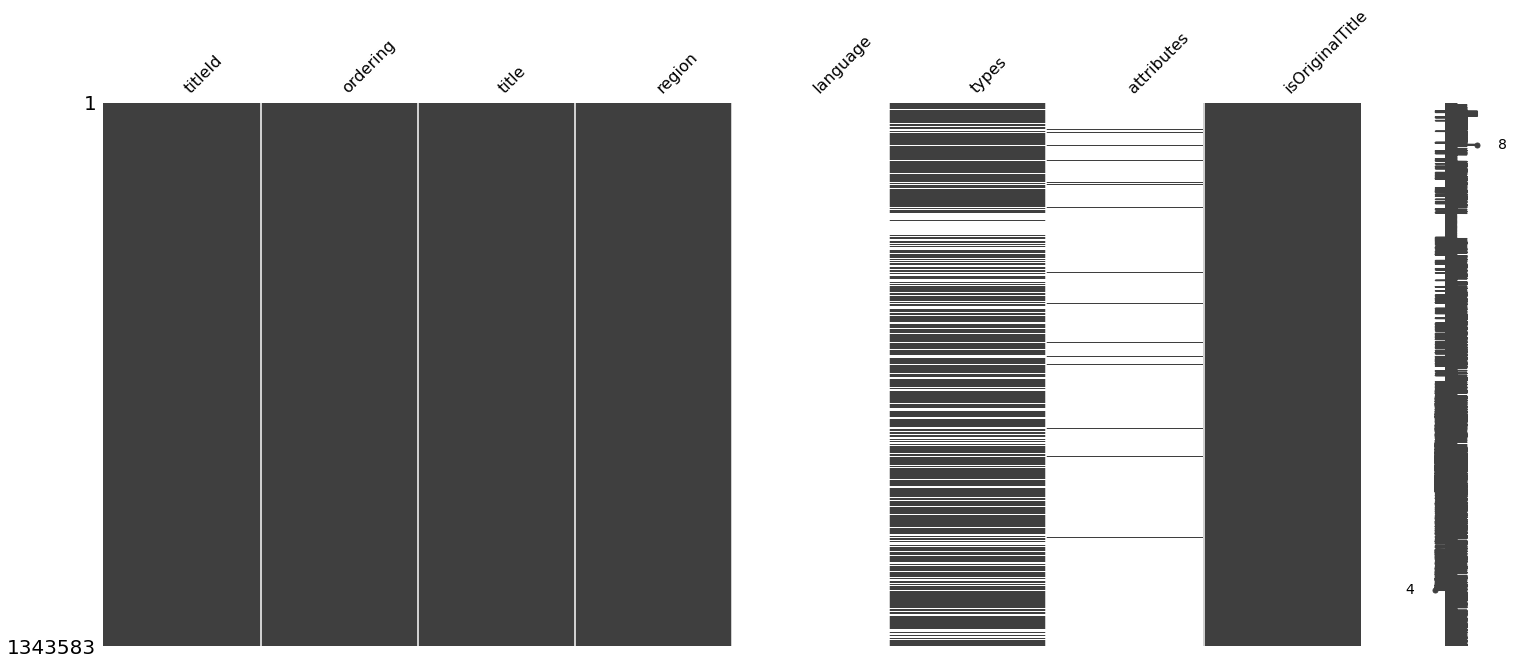

In [19]:
## replace\N placeholders with NaN and re-check for nuls
akas.replace({'\\N':np.nan},inplace=True)
pf.check_nulls_nunique(akas)

**Oberservations:**

* *language*: Dose not serve a purpose, going to drop it. 

* *types*: Will Explore

In [20]:
akas.drop(columns='language',inplace=True)
akas.head()

,titleId,ordering,title,region,types,attributes,isOriginalTitle
5,tt0000001,6,Carmencita,US,imdbDisplay,NaN,0
14,tt0000002,7,The Clown and His Dogs,US,NaN,literal English title,0
33,tt0000005,10,Blacksmith Scene,US,imdbDisplay,NaN,0
36,tt0000005,1,Blacksmithing Scene,US,alternative,NaN,0
41,tt0000005,6,Blacksmith Scene #1,US,alternative,NaN,0


C:\Users\nbeac\anaconda3\envs\dojo-env\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 2 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\nbeac\anaconda3\envs\dojo-env\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 2 missing from current font.
  font.set_text(s, 0, flags=flags)


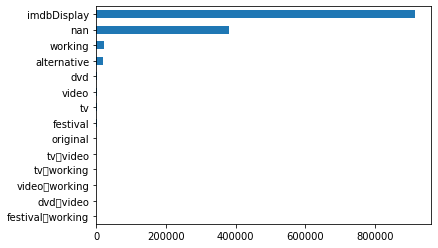

In [21]:
akas['types'].value_counts(dropna=False).sort_values().plot(kind='barh');

This table will be primarily used to filter regions and possibly referenced later on for comparing duplicated titles that had unique IDs in title basics. 

# Final Filtering: Removing Non-US Movies

***
Now that both **AKAs** and **Basics** are processed, we'll remove any movie IDs from the title basics that are **NOT** in the *US-filtered* **AKAs** dataframe. 
***

In [22]:
## Only keep movie ids that are in the final filtered akas
keepers = basics['tconst'].isin(akas['titleId'])
basics = basics[keepers]
basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
34790,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,118,"Comedy,Fantasy,Romance"
61089,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El Tango del Viudo y Su Espejo Deformante,0,2020.0,70,Drama
67635,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,122,Drama
86766,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,100,"Comedy,Horror,Sci-Fi"
92731,tt0094859,movie,Chief Zabu,Chief Zabu,0,2016.0,74,Comedy
...,...,...,...,...,...,...,...,...
9160453,tt9914942,movie,Life Without Sara Amat,La vida sense la Sara Amat,0,2019.0,74,Drama
9160849,tt9915872,movie,The Last White Witch,My Girlfriend is a Wizard,0,2019.0,97,"Comedy,Drama,Fantasy"
9160989,tt9916170,movie,The Rehearsal,O Ensaio,0,2019.0,51,Drama
9160998,tt9916190,movie,Safeguard,Safeguard,0,2020.0,95,"Action,Adventure,Thriller"


In [23]:
## Keeping only movie that exist in basics 
keepers_akas = ratings['tconst'].isin(akas['titleId'])
keepers_basics = ratings['tconst'].isin(basics['tconst'])

print('- If filter using AKAs:')
display(keepers_akas.value_counts())

print('- If filter using Basics:')
display(keepers_basics.value_counts())

- If filter using AKAs:


False    781448
True     474546
Name: tconst, dtype: int64

- If filter using Basics:


False    1188577
True       67417
Name: tconst, dtype: int64

In [24]:
ratings_final = ratings[keepers_basics]
ratings_final

,tconst,averageRating,numVotes
17858,tt0035423,6.4,84514
40611,tt0062336,6.4,161
46441,tt0069049,6.7,7332
63388,tt0088751,5.2,323
68659,tt0094859,7.9,83
...,...,...,...
1255913,tt9914942,6.7,152
1255946,tt9915872,7.7,8
1255960,tt9916170,7.2,6
1255961,tt9916190,3.6,236


In [25]:
basics.to_csv("Data/title_basics_cleaned.csv.gz",compression='gzip',index=False)
basics = pd.read_csv("Data/title_basics_cleaned.csv.gz")
basics.info()
basics.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82198 entries, 0 to 82197
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          82198 non-null  object 
 1   titleType       82198 non-null  object 
 2   primaryTitle    82198 non-null  object 
 3   originalTitle   82198 non-null  object 
 4   isAdult         82198 non-null  int64  
 5   startYear       82198 non-null  float64
 6   runtimeMinutes  82198 non-null  int64  
 7   genres          82198 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 5.0+ MB


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,118,"Comedy,Fantasy,Romance"
1,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El Tango del Viudo y Su Espejo Deformante,0,2020.0,70,Drama
2,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,122,Drama
3,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,100,"Comedy,Horror,Sci-Fi"
4,tt0094859,movie,Chief Zabu,Chief Zabu,0,2016.0,74,Comedy


In [26]:
ratings.to_csv("Data/title_ratings_cleaned.csv.gz",compression='gzip',index=False)
ratings = pd.read_csv("Data/title_ratings_cleaned.csv.gz")
ratings.info()
ratings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255994 entries, 0 to 1255993
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1255994 non-null  object 
 1   averageRating  1255994 non-null  float64
 2   numVotes       1255994 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 28.7+ MB


,tconst,averageRating,numVotes
0,tt0000001,5.7,1905
1,tt0000002,5.8,256
2,tt0000003,6.5,1703
3,tt0000004,5.6,168
4,tt0000005,6.2,2518


In [27]:
akas.to_csv("Data/title_akas_cleaned.csv.gz",compression='gzip',index=False)
akas = pd.read_csv("Data/title_akas_cleaned.csv.gz")
akas.info()
akas.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1343583 entries, 0 to 1343582
Data columns (total 7 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   titleId          1343583 non-null  object 
 1   ordering         1343583 non-null  int64  
 2   title            1343583 non-null  object 
 3   region           1343583 non-null  object 
 4   types            963456 non-null   object 
 5   attributes       44782 non-null    object 
 6   isOriginalTitle  1342208 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 71.8+ MB


,titleId,ordering,title,region,types,attributes,isOriginalTitle
0,tt0000001,6,Carmencita,US,imdbDisplay,NaN,0.0
1,tt0000002,7,The Clown and His Dogs,US,NaN,literal English title,0.0
2,tt0000005,10,Blacksmith Scene,US,imdbDisplay,NaN,0.0
3,tt0000005,1,Blacksmithing Scene,US,alternative,NaN,0.0
4,tt0000005,6,Blacksmith Scene #1,US,alternative,NaN,0.0


# Final Movie Count

In [28]:
print(f"There are {len(basics):,} rows in title_basics")
print(f"There are {len(ratings):,} rows in title_ratings")
print(f"There are {len(akas):,} rows in akas")

There are 82,198 rows in title_basics
There are 1,255,994 rows in title_ratings
There are 1,343,583 rows in akas
